# Logistic Regression Project - Solutions

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Age', ylabel='Count'>

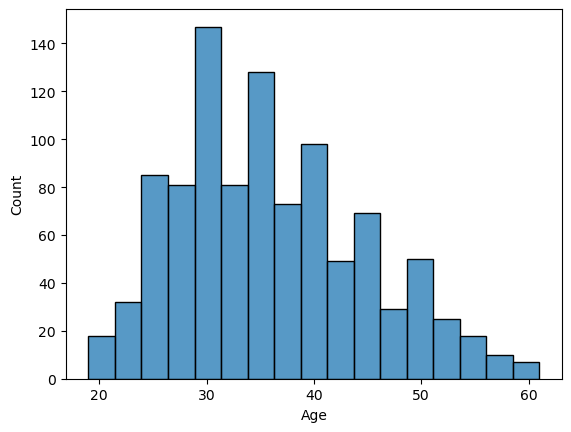

In [7]:
sns.histplot(x = 'Age', data = ad_data)

**Create a jointplot showing Area Income versus Age.**

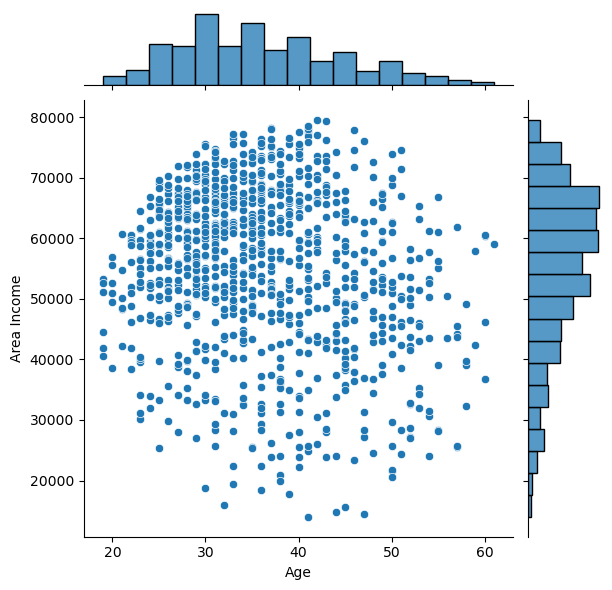

In [8]:
sns.jointplot(x = "Age", y = "Area Income",
              kind = "scatter", data = ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

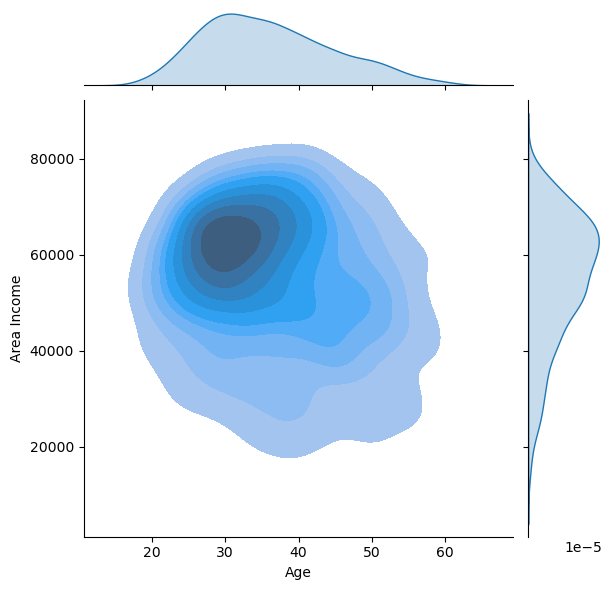

In [9]:
sns.jointplot(x = "Age", y = "Area Income",
              kind = "kde", data = ad_data, fill=True)

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

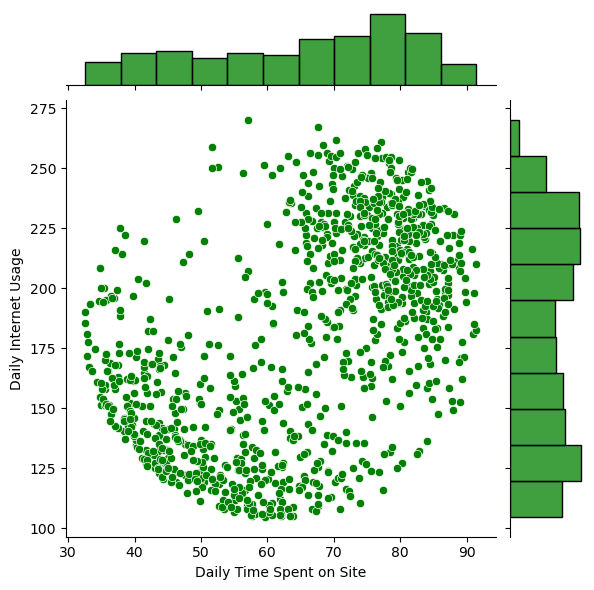

In [10]:
sns.jointplot(y = "Daily Internet Usage", x = "Daily Time Spent on Site",
              kind = "scatter", data = ad_data, color = 'green')

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

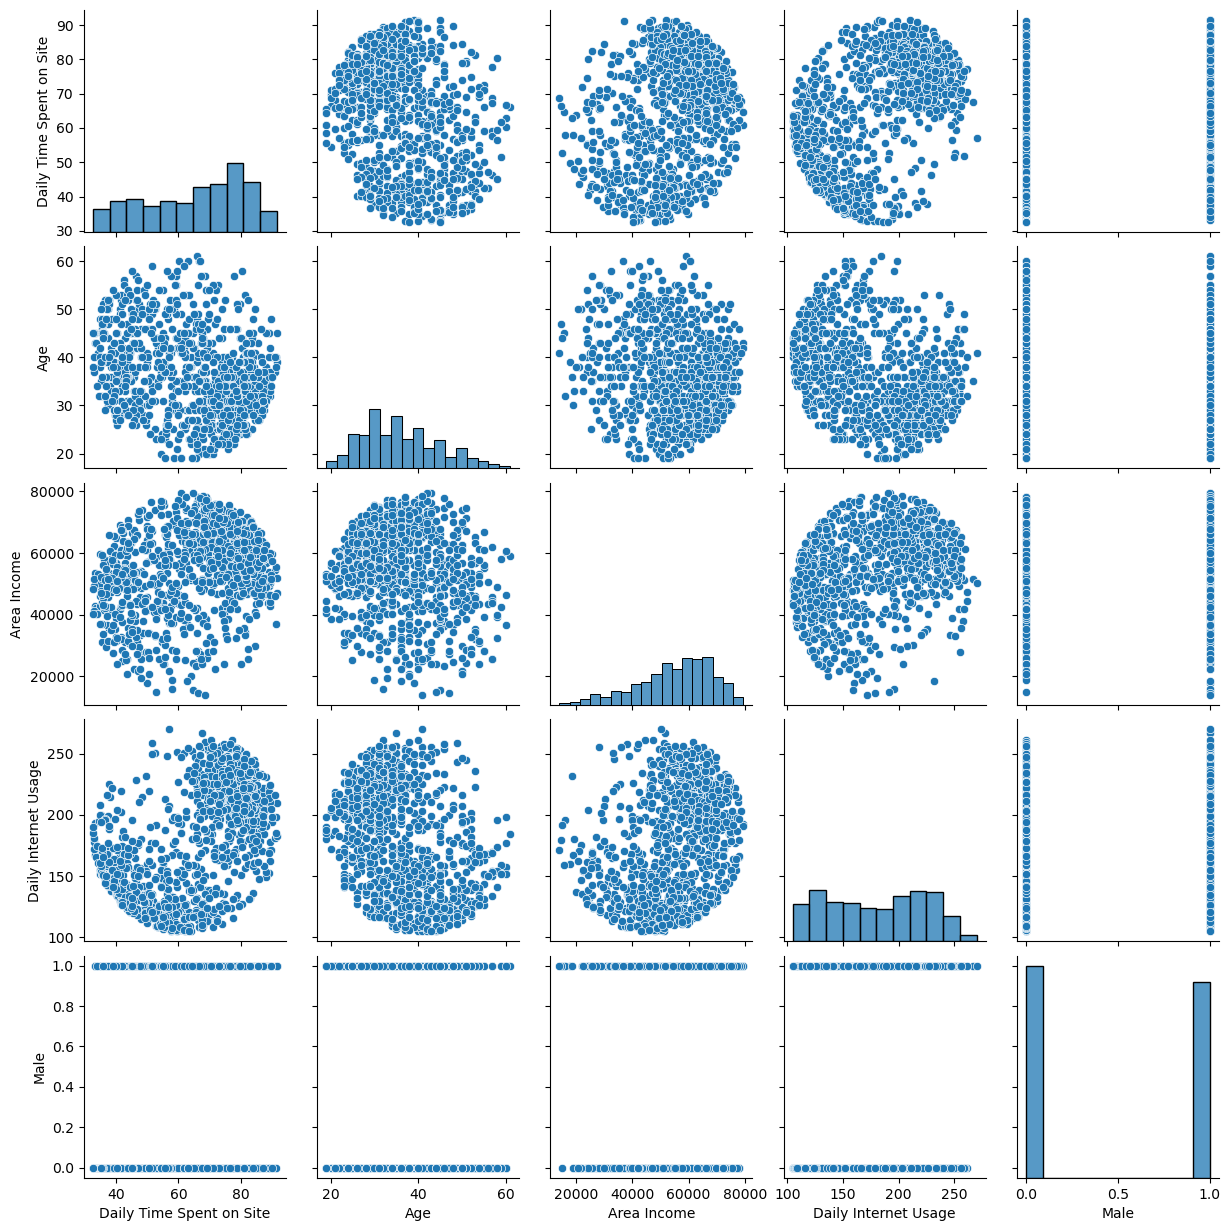

In [11]:
sns.pairplot(ad_data, x_vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male'],
    y_vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male'])

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
x = ad_data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]]
y = ad_data["Male"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [48]:
lr = LogisticRegression(max_iter = 1000)


In [49]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [51]:
predictions = logmodel.predict(X_test)
predictions

array([35, 45, 41, 41, 29, 35, 30, 45, 33, 36, 26, 42, 45, 30, 52, 50, 52,
       41, 31, 45, 31, 42, 50, 31, 29, 50, 26, 26, 41, 31, 25, 41, 30, 42,
       45, 31, 31, 31, 52, 52, 31, 52, 30, 41, 26, 30, 41, 45, 30, 45, 40,
       26, 42, 31, 30, 26, 26, 45, 31, 45, 31, 42, 36, 40, 42, 52, 45, 30,
       41, 44, 41, 35, 35, 31, 42, 31, 30, 52, 31, 33, 57, 45, 33, 31, 35,
       26, 26, 26, 35, 29, 35, 33, 31, 31, 31, 25, 45, 45, 30, 30, 41, 26,
       45, 29, 52, 33, 36, 35, 45, 30, 52, 31, 42, 50, 36, 21, 30, 35, 31,
       41, 31, 42, 45, 31, 41, 26, 42, 26, 32, 41, 50, 45, 42, 31, 30, 35,
       30, 30, 29, 42, 30, 26, 41, 33, 26, 41, 31, 31, 26, 30, 30, 29, 41,
       25, 45, 35, 52, 26, 30, 31, 41, 45, 25, 35, 36, 25, 29, 26, 33, 31,
       42, 26, 45, 26, 35, 42, 42, 35, 52, 42, 35, 29, 40, 41, 41, 50, 30,
       45, 40, 42, 31, 41, 30, 31, 42, 52, 42, 44, 26, 40, 26, 31, 31, 26,
       45, 26, 31, 31, 29, 31, 31, 31, 50, 45, 40, 29, 29, 25, 30, 41, 30,
       37, 50, 41, 26, 26

**Create a classification report for the model.**

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         8
          24       0.00      0.00      0.00         7
          25       0.22      0.20      0.21        10
          26       0.03      0.14      0.05         7
          27       0.00      0.00      0.00         9
          28       0.00      0.00      0.00        18
          29       0.07      0.07      0.07        15
          30       0.00      0.00      0.00        10
          31       0.10      0.21      0.14        24
          32       0.00      0.00      0.00        18
          33       0.09      0.09      0.09        11
          34       0.00      0.00      0.00         8
          35       0.00      0.00      0.00        11
          36       0.36    

/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adityaga

## Great Job!